In [95]:
import rdkit

In [96]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults

from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import MolFromSmiles
from rdkit.Chem import rdPartialCharges

from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, rdmolops
from rdkit.Chem.Draw import IPythonConsole

from rdkit.Chem import rdchem
from rdkit.Chem.rdchem import EditableMol
from rdkit.Chem.rdchem import Atom
from rdkit.Chem import rdqueries

import urllib.request as ur

In [97]:
#CODE FOR SUBSTITUTION SN1

In [98]:
listOfLG = {'Hydrogen Sulfate':'O[S]([O-])(=O)=O', 'Bromine':'Br', 'Chloride':'Cl', 'Iodide':'I', 
            'Sulfonic Acid':'O[S]([O-])=O', 'Ammonia':'N', 'Water':'O'}
listOfNucs = {'Sodium Hydroxide':'[OH-].[Na+]', 'Sodium Methoxide':'C[O-].[Na+]', 'Methyllithium':'[Li]C', 
              'Potassium Hydroxide':'[OH-].[K+]', 'Sodium Cyanide':'[Na+].[C-]#N', 'Potassium Cyanide':'[K+].[C-]#N', 
              'Sodium Acetylide':'C#[C-].[Na+]', 'Sodium Amide':'[NH2-].[Na+]',
             'Sodium Iodide':'[Na+].[I-]', 'Lithium Bromide':'[Li+].[Br-]', 'Potassium Iodide':'[K+].[I-]', 
              'Sodium Azide':'[Na+].[N-]=[N+]=[N-]'}
weakNuc = {'Water':'O', 'Hydrogen Sulfide':'S', 'Methonal':'CO', 'Methanethiol':'CS', 'Ethanethiol':'CCS', 'Ethanol':'CCO'}


In [99]:
#find reactant with nucleophile and determine nucleophile 
def findNuc(reac1, reac2):
    nuc = ''
    for key, value in weakNuc.items():
        if reac1 == value or reac2 == value:
            nuc = value
            break
    if nuc == '':
        print('Neither of the reactants entered are nucleophiles')
    return nuc


In [100]:
#find reactant with leaving group and determine leaving group
def findLG(reac1, reac2):
    lg = ''
    leaving_group = ''
    reac = findNuc(reac1, reac2)
    if reac == reac1:
        lg = reac2
    else: 
        lg = reac1
    #print(lg)
    for key, value in listOfLG.items():
        if value == 'O':
            leaving_group = value
        elif value in lg:
            leaving_group = value
            break
    if leaving_group == '':
        print('Neither of the reactants entered are leaving groups')
    return leaving_group

In [101]:
#find reactant with nucleophile
def findReactant(reac1, reac2):
    attack = ''
    reac = findNuc(reac1, reac2)
    if reac == reac1:
        reactant = reac2
    else: 
        reactant = reac1
    return reactant

In [102]:
#create negatively charged nucleophile
import re
def stripNew(reac):
    reac = re.sub("H","",reac)
    neg = findNeg(reac)

    neg = neg[0]
    
    neg = re.sub("-","",neg)
    neg = re.sub("\[","",neg)
    neg = re.sub("\]","",neg)
    
    return neg

In [103]:
#nucleophilic substitution SN1 first and last step reaction 
def subs1(reac1, reac2):
    nucleophile = findNuc(reac1, reac2)
    leaving_g = findLG(reac1, reac2)
    r = findReactant(reac1, reac2)
    takeOff= 'C' + leaving_g
    putOn = 'C' + stripNew(nucleophile)
    cation = removeLG(r, leaving_g)
    mod_mol = rdmolops.ReplaceSubstructs(Chem.MolFromSmiles(r), Chem.MolFromSmiles(takeOff), Chem.MolFromSmiles(putOn))
    mod_mol_ = mod_mol[0]
   
    
    mod_mol_str = Chem.rdmolfiles.MolToSmiles(mod_mol_)
    
    cationMol=Chem.MolFromSmiles(cation)
    
    reaction = ("%s.%s>>%s.%s" % (reac1, reac2, leaving_g, mod_mol_str))
    print(reaction)
    AllChem.ReactionFromSmarts(reaction)
    print('Your intermediate cation is: %s' % cation)
    display(cationMol)
    
    return(AllChem.ReactionFromSmarts(reaction, useSmiles=True))

In [104]:
#form carbocation from leaving group leaving substrate
def step1(reac1, reac2):
    nucleophile = findNuc(reac1, reac2)
    leaving_g = findLG(reac1, reac2)
    r = findReactant(reac1, reac2)
    print("reactant is %s" % r)
    cation = removeLG(r, leaving_g)
    return cation

In [105]:
#remove leaving group from reactant with leaving group
def removeLG(mol, lg):
    if lg in mol:
        mola1 = mol.replace(lg, "")
        return mola1

In [106]:
#add nucleophile and carbocation
def addNuc(mol, nuc):
    newMol = rdmolops.CombineMols(Chem.MolFromSmiles(mol), Chem.MolFromSmiles(nuc))
    return newMol

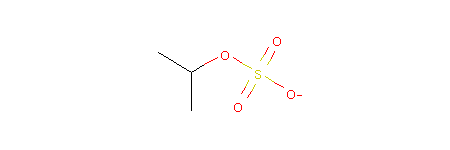

In [107]:
#first reactant
mola = 'CC(C)O[S]([O-])(=O)=O'
Chem.MolFromSmiles(mola)

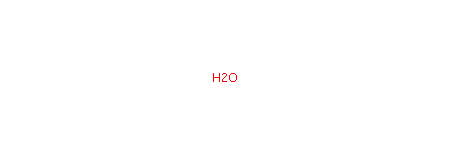

In [108]:
#second reactant
molb = 'O'
Chem.MolFromSmiles(molb)

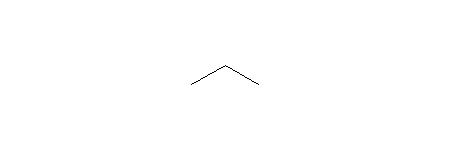

In [109]:
#first reactant without leaving group --CARBOCATION IS FAILURE DISCUSSED IN PAPER
molc = removeLG(mola, findLG(mola, molb))
Chem.MolFromSmiles(molc)

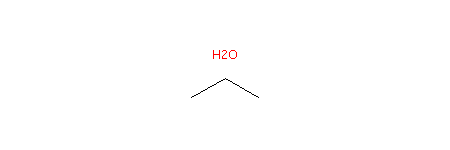

In [110]:
#add nucleophile to carbocation- THIS IS ONE OF THE FAILURES DISCUSSED IN PAPER
addNuc(molc, molb)

In [111]:
#find the nucleophile in the reactants
mol = findNuc(mola, molb)
mol

'O'

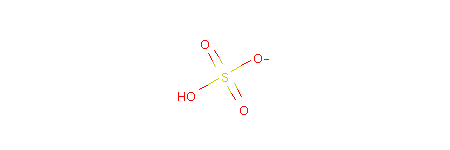

In [112]:
#find the leaving group in the reactants
x=findLG(mola, molb)
x1=Chem.MolFromSmiles(x)
x1

CC(C)O[S]([O-])(=O)=O.O>>O[S]([O-])(=O)=O.CC(C)O
Your intermediate cation is: CC(C)


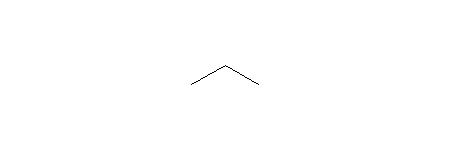

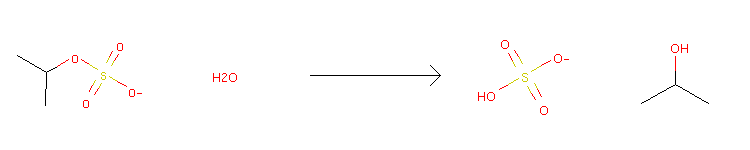

In [113]:
#full reaction with 2 reactants and 2 products, carbocation is also shown
subs1(mola, molb)

In [114]:
#first step of reaction (form carbocation that is shown in subs(mola, molb))
mol5 = step1(mola, molb)
mol5

reactant is CC(C)O[S]([O-])(=O)=O


'CC(C)'